In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import json
from arcgis.features import FeatureLayer
import requests
import time

# API call

In [24]:
# # remove everything after "FeatureServer/0" in the URL 
# url = 'https://services1.arcgis.com/79kfd2K6fskCAkyg/arcgis/rest/services/eExpenditures_2023/FeatureServer/0'

# batch_size = 1000  # Number of records to retrieve per batch
# offset = 0  # Initial offset value
# data_list = []
# # ​Create the feature layer object
# feature_layer = FeatureLayer(url)

# while True:
#     # Query the feature layer with pagination
#     query_result = feature_layer.query(where='1=1', out_fields='*', return_geometry=False, result_offset=offset, result_record_count=batch_size)
    
#     # Retrieve the features from the query result
#     features = query_result.features
    
#     # Process the data for the current batch
#     for feature in features:
#         data_list.append(feature.attributes)
    
#     # Break the loop if the response is empty or the desired number of records is reached
#     if len(features) == 0 or len(data_list) >= 1000:
#         break
    
#     # Increment the offset by the batch size
#     offset += batch_size
# # Create a DataFrame from the data list
# df = pd.DataFrame(data_list)

# df.to_csv('expen.csv')


# local file

In [25]:
df = pd.read_csv("expen.csv", low_memory=False)

In [26]:
columns_to_drop = ['fiscal_year', 'invoice_date', 'invoice_number', 'invoice_amount']
df = df.drop(columns=columns_to_drop)
df.head()

,Unnamed: 0,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount,ObjectId
0,0,LOUISVILLE/JEFF CO METRO REVENUE COMM,2023-05-25,AD_HOC_PAYMENT-3-5937,OMB Finance,Operating,NaN,Interest Expense,210 OMB Administration,NaN,NaN,NaN,1101 General Fund,NaN,NaN,3.52,1
1,1,Abria King,2022-12-15,AD_HOC_PAYMENT-3-4369,Develop Louisville,Operating,NaN,Forgivable Loans,506 Housing Operations,NaN,MARKET RATE HOUSING,NaN,1101 General Fund,NaN,NaN,29700.00,2
2,2,Employee: Kayla Thomas,2023-06-05,ER00003434,Louisville Metro Police Department,Operating,Travel Expense,Travel Per Diem (GSA)- Meals,305 LMPD Training,NaN,NaN,NaN,1101 General Fund,NaN,NaN,51.75,3
3,3,Employee: Regina Phillips,2023-06-02,ER00003410,KentuckianaWorks,Operating,Travel Expense,Travel State Rate Per Diem,953 KentuckianaWorks,NaN,NaN,NaN,9502 Related Agencies,NaN,NaN,121.00,4
4,4,Secured Transactions LLC dba Homestretch Mort...,2023-06-07,AD_HOC_PAYMENT-3-6053,Economic Development,Capital,NaN,Non-Forgivable Loans,505 Econ Dev Loan Administration,KEOZ Grant METCO Loan Fund,NaN,GR00000163 METCO Loan Disbursements State Fund,Grant Fund,State Fund,NaN,50000.00,5


In [27]:
df['payment_date'] = pd.to_datetime(df['payment_date'])

# Filter for the year 2023
df = df[df['payment_date'].dt.year == 2023]

In [28]:
df['payee'].value_counts()

LOUISVILLE GAS & ELECTRIC COMPANY    33755
D-C ELEVATOR COMPANY INC              5488
BRODART CO                            1558
OFFICE DEPOT INC                       654
UNIFIRST CORPORATION                   638
                                     ...  
Employee: Justin Witt                    1
Employee: Garrett Britton                1
Employee: Ne'Mondre Winburn              1
Employee: Nicholas Gray                  1
AMZN MKTP US L826I4VJ3                   1
Name: payee, Length: 8771, dtype: int64

In [29]:
df = df.sort_values(by='extended_amount', ascending=False)
df.head(1)

,Unnamed: 0,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount,ObjectId
75021,75021,WILLIAM S WETTERER,2023-05-08,NaN,Develop Louisville,Capital,NaN,Land,506 ARP DC 3.10 Housing Support: Affordable Ho...,Community Care Campus and Chancery,NaN,GR00001796 ARP-0024-DEL,Grant Fund,Federally Funded,NaN,6801474.69,75022


In [30]:
yum = df[df['payee'] == 'LOUISVILLE ARENA AUTHORITY INC']
yum

,Unnamed: 0,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount,ObjectId


In [31]:
agency = df.groupby('agency')['extended_amount'].sum()
agency = agency.sort_values(ascending=False)
agency

agency
Develop Louisville                             37208308.94
Facilities and Fleet Management                33896759.22
Public Works & Assets                          31536634.32
Public Health & Wellness                       18644320.62
Office of Resilience and Community Services    17654027.13
Office of Civic Innovation and Technology      13540993.43
Parks & Recreation                              9783495.80
Waterfront Development Corp                     9122364.64
OMB Finance                                     9096584.72
Louisville Metro Police Department              7930806.64
Department of Corrections                       7502737.11
Louisville Zoo                                  6195081.48
County Clerk                                    5296908.96
Office for Safe & Healthy Neighborhoods         4951631.19
Economic Development                            4526557.93
KentuckianaWorks                                4437396.52
Louisville Free Public Library                  4

In [32]:
payee = df.groupby('payee')['extended_amount'].sum()
payee = payee.sort_values(ascending=False)
payee.head(15)

payee
LOUISVILLE METRO AFFORDABLE HOUSING TRUST FUND     12739806.03
HALL CONTRACTING OF KENTUCKY INC                   12662378.40
LOUISVILLE GAS & ELECTRIC COMPANY                  12526014.89
WATERFRONT DEVELOPMENT CORPORATION                  8848314.64
WELLPATH LLC                                        8247959.90
WILLIAM S WETTERER                                  6801474.69
PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA     5473329.00
CDW LLC                                             5174158.68
JEFFERSON COUNTY CLERK                              4881448.54
LOUISVILLE PAVING COMPANY INC                       4164611.39
GENUINE PARTS COMPANY                               3800646.25
WEX INC                                             3668992.10
KENTUCKY TRUCK SALES INC                            2999300.84
MOTOROLA SOLUTIONS INC                              2764312.55
GOODWILL INDUSTRIES OF KENTUCKY INC                 2503006.07
Name: extended_amount, dtype: float64

In [33]:
# police = df[df.apply(lambda row: row.str.contains('police', case=False).any(), axis=1)]
# police.head(5)

Filters the same as above however its much faster.

In [34]:
police = df[df.applymap(lambda cell: 'police' in str(cell).lower()).any(axis=1)]
police.head(5)


,Unnamed: 0,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount,ObjectId
62050,62050,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,2023-01-12,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0,62051
69547,69547,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,2023-01-12,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0,69548
86134,86134,ZENCITY TECHNOLOGIES US INC,2023-02-22,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0,86135
93265,93265,ZENCITY TECHNOLOGIES US INC,2023-02-22,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0,93266
121933,121933,L & W EMERGENCY EQUIPMENT,2023-03-06,1202895,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,170804.5,121934


<Axes: >

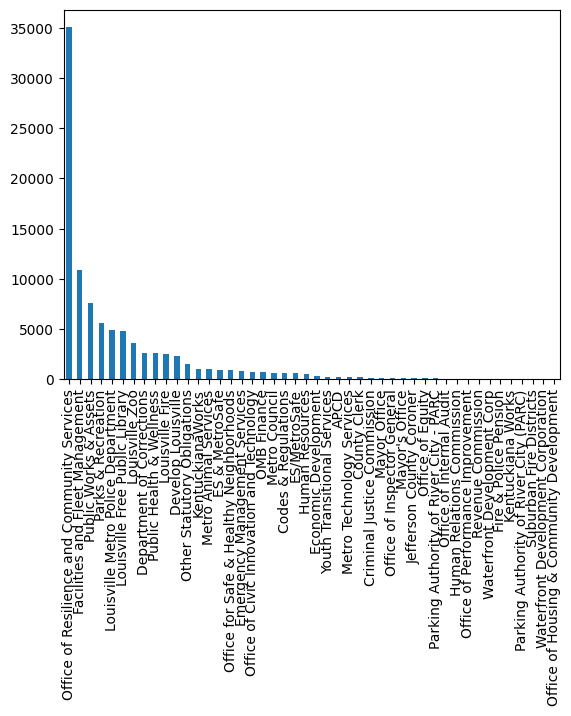

In [35]:
df['agency'].value_counts().plot.bar()

In [36]:
df['extended_amount'].sum().round(2)

241793227.25

In [37]:
police['extended_amount'].sum().round(2)

14088843.33

In [38]:
police.head()

,Unnamed: 0,payee,payment_date,payment_number,agency,expenditure_type,expenditure_category,spend_category,cost_center,project,program,grant_,fund,financing_source,region,extended_amount,ObjectId
62050,62050,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,2023-01-12,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0,62051
69547,69547,PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA,2023-01-12,1197575,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,1918500.0,69548
86134,86134,ZENCITY TECHNOLOGIES US INC,2023-02-22,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0,86135
93265,93265,ZENCITY TECHNOLOGIES US INC,2023-02-22,1201906,Louisville Metro Police Department,Operating,NaN,Professional Services,305 Administrative Bureau,NaN,NaN,NaN,1101 General Fund,NaN,NaN,196000.0,93266
121933,121933,L & W EMERGENCY EQUIPMENT,2023-03-06,1202895,Facilities and Fleet Management,Capital,NaN,Vehicles Light Trucks General Transp Use,245 Vehicles Capital,ORD 084 SERIES 2022 Police Fleet,NaN,NaN,Debt Service,FY23 NOTE,NaN,170804.5,121934


In [39]:
police['cost_center'].value_counts()

305 LMPD Training                                  2292
305 LMPD Major Crimes Division CIS                  239
305 LMPD Agreements                                 217
305 Information Technology - Technical Services     181
305 Chief's Office Adm                              177
                                                   ... 
520 Permit & License Enforcement                      1
245 Project Management                                1
305 CGIC                                              1
370 Inmate Services                                   1
305 Crime Information Center                          1
Name: cost_center, Length: 77, dtype: int64

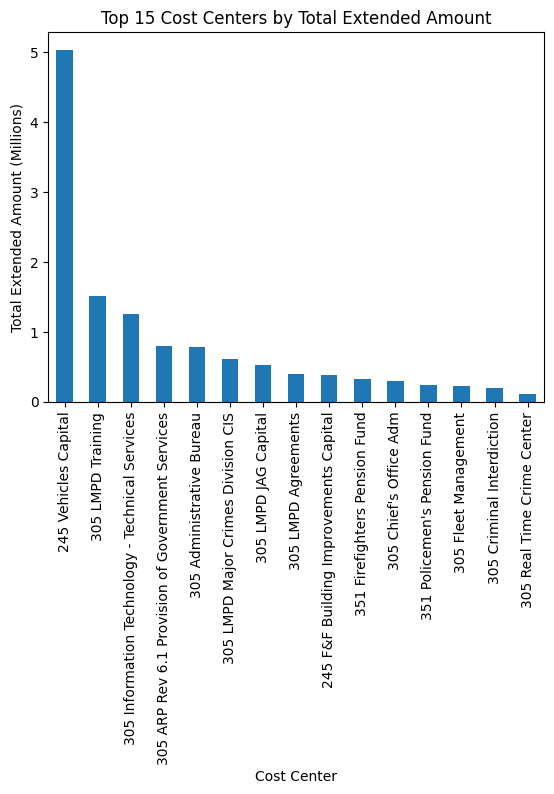

In [40]:
grouped_data = police.groupby('cost_center')['extended_amount'].sum()
top_15 = grouped_data.sort_values(ascending=False).head(15)


top_15_in_millions = top_15 / 1e6
top_15_in_millions.plot(kind='bar')
plt.xlabel('Cost Center')
plt.ylabel('Total Extended Amount (Millions)')
plt.title('Top 15 Cost Centers by Total Extended Amount')
plt.xticks(rotation=90)
plt.show()

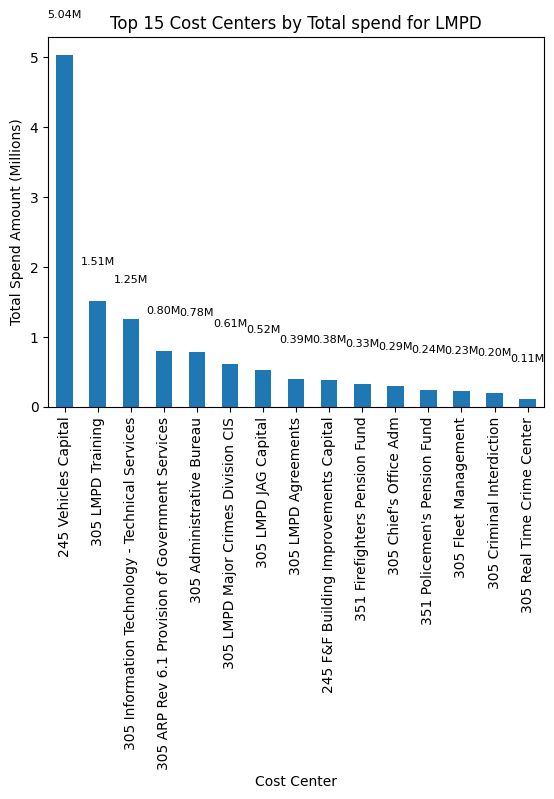

In [41]:
grouped_data = police.groupby('cost_center')['extended_amount'].sum()
top_15 = grouped_data.sort_values(ascending=False).head(15)

# Convert y-axis values to millions and create a bar plot
top_15_in_millions = top_15 / 1e6  # Convert to millions
ax = top_15_in_millions.plot(kind='bar')
plt.xlabel('Cost Center')
plt.ylabel('Total Spend Amount (Millions)')
plt.title('Top 15 Cost Centers by Total spend for LMPD')
plt.xticks(rotation=90)

# Annotate the bars with the total amount spent
for i, v in enumerate(top_15_in_millions):
    ax.text(i, v + 0.5, f'{v:.2f}M', ha='center', va='bottom', fontsize=8)

plt.show()

In [46]:
grouped_data = police.groupby('payee')['extended_amount'].sum()
top_15 = grouped_data.sort_values(ascending=False).head(15)
top_15
# top_15.to_csv('top_payee.csv')

payee
PAUL MILLER FORD INC DBA PAUL MILLER FORD MAZDA    3984835.00
KIESLER POLICE SUPPLY INC                           575212.58
BACHMAN AUTO GROUP INC                              529687.12
DNA LABS INTERNATIONAL                              492520.00
L & W EMERGENCY EQUIPMENT                           467146.87
NORSE TACTICAL LLC                                  465000.00
GALLS PARENT HOLDINGS LLC                           421302.72
ZENCITY TECHNOLOGIES US INC                         392000.00
THE STATE GROUP INDUSTRIAL (USA) LIMITED            370183.00
AT&T SERVICES INC                                   346300.31
PROTEAM TACTICAL PERFORMANCE LLC                    299973.00
DJ LEASING LLC                                      276503.30
PC NET INC                                          270570.00
POLICEMEN'S RETIREMENT FUND                         244798.54
AXON ENTERPRISE INC                                 237155.80
Name: extended_amount, dtype: float64

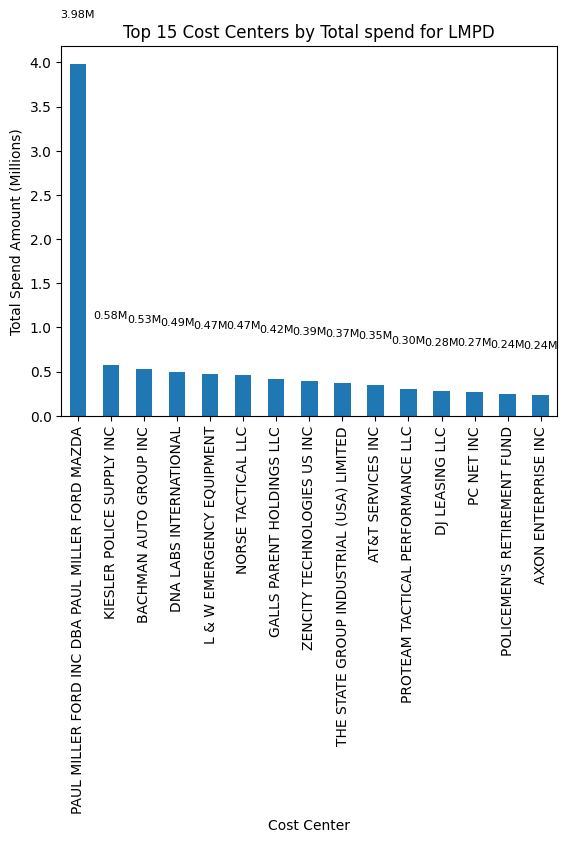

In [43]:
# Convert y-axis values to millions and create a bar plot
top_15_in_millions = top_15 / 1e6  # Convert to millions
ax = top_15_in_millions.plot(kind='bar')
plt.xlabel('Cost Center')
plt.ylabel('Total Spend Amount (Millions)')
plt.title('Top 15 Cost Centers by Total spend for LMPD')
plt.xticks(rotation=90)

# Annotate the bars with the total amount spent
for i, v in enumerate(top_15_in_millions):
    ax.text(i, v + 0.5, f'{v:.2f}M', ha='center', va='bottom', fontsize=8)

plt.show()